In [10]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
legend_properties = {'weight':'bold'}

In [11]:
# # Data Integration
# data_folder = r"E:\data\dao-0310-23\V4_4\Turnover_2"
# dao_performance_list, hierarchy_performance_list, autonomy_performance_list = [], [], []
# dao_diversity_list, hierarchy_diversity_list, autonomy_diversity_list = [], [], []
# for file_index in range(1, 11):
#     dao_performance_file = data_folder + r"\dao_performance_across_turnover_{0}".format(file_index)
#     hierarchy_performance_file = data_folder + r"\hierarchy_performance_across_turnover_{0}".format(file_index)
#     autonomy_performance_file = data_folder + r"\autonomy_performance_across_turnover_{0}".format(file_index)
# 
#     dao_diversity_file = data_folder + r"\dao_diversity_across_turnover_{0}".format(file_index)
#     hierarchy_diversity_file = data_folder + r"\hierarchy_diversity_across_turnover_{0}".format(file_index)
#     autonomy_diversity_file = data_folder + r"\autonomy_diversity_across_turnover_{0}".format(file_index)
# 
#     # dao_variance_file = data_folder + r"\dao_variance_across_turnover_{0}".format(file_index)
#     # hierarchy_variance_file = data_folder + r"\hierarchy_variance_across_turnover_{0}".format(file_index)
#     # autonomy_variance_file = data_folder + r"\autonomy_variance_across_turnover_{0}".format(file_index)
# 
#     with open(dao_performance_file, 'rb') as infile:
#         dao_performance = pickle.load(infile)
#     with open(hierarchy_performance_file, 'rb') as infile:
#         hierarchy_performance = pickle.load(infile)
#     with open(autonomy_performance_file, 'rb') as infile:
#         autonomy_performance = pickle.load(infile)
# 
#     with open(dao_diversity_file, 'rb') as infile:
#         dao_diversity = pickle.load(infile)
#     with open(hierarchy_diversity_file, 'rb') as infile:
#         hierarchy_diversity = pickle.load(infile)
#     with open(autonomy_diversity_file, 'rb') as infile:
#         autonomy_diversity = pickle.load(infile)
# 
#     # with open(dao_variance_file, 'rb') as infile:
#     #     dao_variance = pickle.load(infile)
#     # with open(hierarchy_variance_file, 'rb') as infile:
#     #     hierarchy_variance = pickle.load(infile)
#     # with open(autonomy_variance_file, 'rb') as infile:
#     #     autonomy_variance = pickle.load(infile)
# 
#     dao_performance_list.append(dao_performance)
#     hierarchy_performance_list.append(hierarchy_performance)
#     autonomy_performance_list.append(autonomy_performance)
# 
#     dao_diversity_list.append(dao_diversity)
#     hierarchy_diversity_list.append(hierarchy_diversity)
#     autonomy_diversity_list.append(autonomy_diversity)
# 
# turnover_rate_list = [0.05, 0.10, 0.15, 0.20, 0.25]
# dao_performance, hierarchy_performance, autonomy_performance = [], [], []
# dao_diversity, hierarchy_diversity, autonomy_diversity = [], [], []
# for i in range(len(turnover_rate_list)):
#     dao_performance.append(sum([each[i] for each in dao_performance_list]) / len(dao_performance_list))
#     hierarchy_performance.append(sum([each[i] for each in hierarchy_performance_list]) / len(hierarchy_performance_list))
#     autonomy_performance.append(sum([each[i] for each in autonomy_performance_list]) / len(autonomy_performance_list))
# 
#     dao_diversity.append(sum([each[i] for each in dao_diversity_list]) / len(dao_diversity_list))
#     hierarchy_diversity.append(sum([each[i] for each in hierarchy_diversity_list]) / len(hierarchy_diversity_list))
#     autonomy_diversity.append(sum([each[i] for each in autonomy_diversity_list]) / len(autonomy_diversity_list))
# 
# with open(data_folder + r"\dao_performance_across_turnover", 'wb') as outfile:
#     pickle.dump(dao_performance, outfile)
# with open(data_folder + r"\hierarchy_performance_across_turnover", 'wb') as outfile:
#     pickle.dump(hierarchy_performance, outfile)
# with open(data_folder + r"\autonomy_performance_across_turnover", 'wb') as outfile:
#     pickle.dump(autonomy_performance, outfile)
# 
# with open(data_folder + r"\dao_diversity_across_turnover", 'wb') as outfile:
#     pickle.dump(dao_diversity, outfile)
# with open(data_folder + r"\hierarchy_diversity_across_turnover", 'wb') as outfile:
#     pickle.dump(hierarchy_diversity, outfile)
# with open(data_folder + r"\autonomy_diversity_across_turnover", 'wb') as outfile:
#     pickle.dump(autonomy_diversity, outfile)

In [12]:
data_folder = r"E:\data\dao-0310-23\V4_4\Turnover_2"
turnover_rate_list = [0.05, 0.10, 0.15, 0.20, 0.25]
dao_performance_file = data_folder + r"\dao_performance_across_turnover"
hierarchy_performance_file = data_folder + r"\hierarchy_performance_across_turnover"
autonomy_performance_file = data_folder + r"\autonomy_performance_across_turnover"

dao_diversity_file = data_folder + r"\dao_diversity_across_turnover"
autonomy_diversity_file = data_folder + r"\autonomy_diversity_across_turnover"
hierarchy_diversity_file = data_folder + r"\hierarchy_diversity_across_turnover"

with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)
with open(hierarchy_performance_file, 'rb') as infile:
    hierarchy_performance = pickle.load(infile)
with open(autonomy_performance_file, 'rb') as infile:
    autonomy_performance = pickle.load(infile)

with open(dao_diversity_file, 'rb') as infile:
    dao_diversity = pickle.load(infile)
with open(hierarchy_diversity_file, 'rb') as infile:
    hierarchy_diversity = pickle.load(infile)
with open(autonomy_diversity_file, 'rb') as infile:
    autonomy_diversity = pickle.load(infile)

print(dao_performance)

[0.637170031746032, 0.5908477460317464, 0.5314238730158732, 0.48192025396825394, 0.44659193650793616]


In [13]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

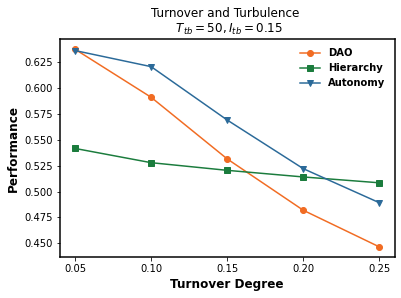

<Figure size 432x288 with 0 Axes>

In [14]:
x = turnover_rate_list
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.xlabel('Turnover Degree', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.plot(x, dao_performance, "-o", label="DAO", color=nature_orange)
plt.plot(x, hierarchy_performance, "-s", label="Hierarchy", color=nature_green)
plt.plot(x, autonomy_performance, "-v", label="Autonomy", color=nature_blue)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.xticks(x)
plt.title("Turnover and Turbulence \n $T_{tb}=50, I_{tb}=0.15$")
plt.savefig(data_folder + r"\DHA_performance_across_turnover.png", transparent=True, dpi=300)
plt.show()
plt.clf()

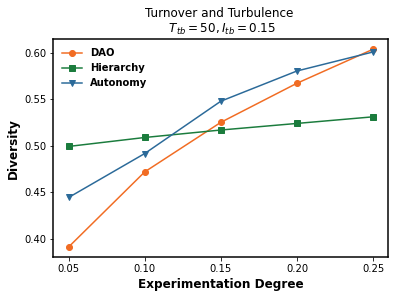

<Figure size 432x288 with 0 Axes>

In [15]:
x = turnover_rate_list
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.xlabel('Experimentation Degree', fontweight='bold', fontsize=12)
plt.ylabel('Diversity', fontweight='bold', fontsize=12)
plt.plot(x, dao_diversity, "-o", label="DAO", color=nature_orange)
plt.plot(x, hierarchy_diversity, "-s", label="Hierarchy", color=nature_green)
plt.plot(x, autonomy_diversity, "-v", label="Autonomy", color=nature_blue)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.xticks(x)
plt.title("Turnover and Turbulence \n $T_{tb}=50, I_{tb}=0.15$")
plt.savefig(data_folder + r"\DHA_diversity_across_turnover.png", transparent=True, dpi=300)
plt.show()
plt.clf()

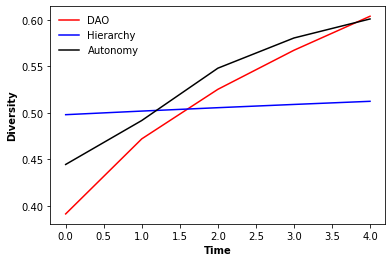

<Figure size 432x288 with 0 Axes>

In [7]:
# Diversity
x = range(len(dao_performance))
plt.plot(range(len(dao_diversity)), dao_diversity, "r-", label="DAO")
plt.plot(range(len(hierarchy_diversity)), hierarchy_diversity, "b-", label="Hierarchy")
plt.plot(range(len(autonomy_diversity)), autonomy_diversity, "k-", label="Autonomy")
plt.xlabel('Time', fontweight='bold', fontsize=10)
plt.ylabel('Diversity', fontweight='bold', fontsize=10)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=10)
plt.savefig(data_folder + r"\DHA_diversity.png", transparent=False, dpi=300)
plt.show()
plt.clf()

In [8]:
# # Variance
# x = range(len(dao_performance))
# plt.plot(x, dao_variance, "r-", label="DAO")
# plt.plot(x, hierarchy_variance, "b-", label="Hierarchy")
# plt.plot(x, autonomy_variance, "k-", label="Autonomy")
# plt.xlabel('Time', fontweight='bold', fontsize=10)
# plt.ylabel('Variance', fontweight='bold', fontsize=10)
# # plt.xticks(x)
# plt.legend(frameon=False, ncol=1, fontsize=10)
# plt.savefig(data_folder + r"\DHA_variance.png", transparent=False, dpi=300)
# plt.show()
# plt.clf()

In [9]:
# x = range(len(dao_performance))
# # x = range(500)
# plt.plot(x, dao_performance[:len(x)], "r-", label="DAO")
# plt.plot(x, dao_performance_2[:len(x)], "r--", label="DAO_2")
# plt.plot(x, hierarchy_performance[:len(x)], "b-", label="Hierarchy")
# plt.plot(x, hierarchy_performance_2[:len(x)], "b--", label="Hierarchy_2") # TTT
# plt.plot(x, autonomy_performance[:len(x)], "k-", label="Autonomy")
# plt.xlabel('Time', fontweight='bold', fontsize=10)
# plt.ylabel('Performance', fontweight='bold', fontsize=10)
# plt.title("Performance")
# # plt.xticks(x)
# plt.legend(frameon=False, ncol=1, fontsize=10)
# plt.savefig(data_folder + r"\DHA_performance.png", transparent=False, dpi=300)
# plt.show()
# plt.clf()